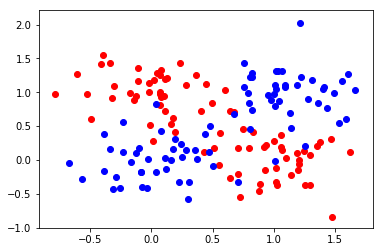

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x=np.zeros((160,2))
for i in range(80):
    r=np.random.rand()
    if(r>0.5):
        x[i] = np.random.multivariate_normal([0,1],0.1* np.identity(2))
    else:
        x[i] = np.random.multivariate_normal([1,0],0.1* np.identity(2))
for i in range(80,160):
    r=np.random.rand()
    if(r>0.5):
        x[i] = np.random.multivariate_normal([0,0],0.1* np.identity(2))
    else:
        x[i] = np.random.multivariate_normal([1,1],0.1*np.identity(2))        
        
plt.scatter(x[:80,0],x[:80,1],c='red')
plt.scatter(x[80:,0],x[80:,1],c='blue')

In [7]:
n=160
t = np.zeros(n)
t[:int(n/2)] = -1
t[int(n/2):] = 1
train_x, train_t = x[:80,:],t[:int(n/2)]
test_x, test_t = x[80:,:],t[int(n/2):] 

In [8]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(train_x, train_t)

num_points = 100

xx, yy = np.meshgrid(np.linspace(-1, 2, num_points), np.linspace(-1, 2, num_points))
pred_t = np.zeros((num_points, num_points))
for i in range(num_points):
    for j in range(num_points):
        pred_t[i, j] = svc.predict([[xx[i, j], yy[i, j]]])

cmap = matplotlib.colors.LinearSegmentedColormap.from_list('rb', [[1., 0.6, 0.6], [0.6, 0.6, 1.]], 2)
plt.pcolor(xx, yy, pred_t, cmap=cmap)

plt.scatter(train_x[:40, 0], train_x[:40, 1], c='r', label='t = -1')
plt.scatter(train_x[40:, 0], train_x[40:, 1], c='b', label='t = 1')
plt.plot([0, 0, 1, 1], [0, 1, 0, 1], 'k+', markersize=15, markeredgewidth=2, label='centers')
#plt.legend(numpoints=1, scatterpoints=1)
plt.xlabel('x1')
plt.ylabel('x2')

plt.xlim(-1, 2)
plt.ylim(-1, 2)

ValueError: The number of classes has to be greater than one; got 1